In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import tkinter as tk

In [35]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [38]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [39]:
df.shape

(768, 9)

In [56]:
X = df.drop(['Outcome'], axis='columns')
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [55]:
# Splitting features and target
Y = df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=7)
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
289            5      108             72             43       75  36.1   
328            2      102             86             36      120  45.5   
394            4      158             78              0        0  32.9   
321            3      112             74             30        0  31.6   
326            1      122             64             32      156  35.1   
..           ...      ...            ...            ...      ...   ...   
579            2      197             70             99        0  34.7   
502            6        0             68             41        0  39.0   
537            0       57             60              0        0  21.7   
196            1      105             58              0        0  24.3   
175            8      179             72             42      130  32.7   

     DiabetesPedigreeFunction  Age  
289                     0.263   33  
328                     0.127   23  
394                     0.803   31  
321                     0.197   25  
326                     0.692   30  
..                        ...  ...  
579                     0.575   62  
502                     0.727   41  
537                     0.735   67  
196                     0.187   21  
175                     0.719   36  

[614 rows x 8 columns]

In [127]:
Y_train

289    0
328    1
394    1
321    1
326    1
      ..
579    1
502    1
537    0
196    0
175    1
Name: Outcome, Length: 614, dtype: int64

In [128]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1       90             62             12       43  27.2   
236            7      181             84             21      192  35.9   
323           13      152             90             33       29  26.8   
98             6       93             50             30       64  28.7   
701            6      125             78             31        0  27.6   
..           ...      ...            ...            ...      ...   ...   
153            1      153             82             42      485  40.6   
392            1      131             64             14      415  23.7   
308            0      128             68             19      180  30.5   
70             2      100             66             20       90  32.9   
513            2       91             62              0        0  27.3   

     DiabetesPedigreeFunction  Age  
353                     0.580   24  
236                     0.586   51  
323                     0.731   43  
98                      0.356   23  
701                     0.565   49  
..                        ...  ...  
153                     0.687   23  
392                     0.389   21  
308                     1.391   25  
70                      0.867   28  
513                     0.525   22  

[154 rows x 8 columns]

In [129]:
Y_test

353    0
236    1
323    1
98     0
701    1
      ..
153    0
392    0
308    1
70     1
513    0
Name: Outcome, Length: 154, dtype: int64

In [130]:
# Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, train_size=0.8, random_state=7)

In [131]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predicted_lr = lr.predict(X_test)
Y_predicted_lr_binary = [1 if i >= 0.5 else 0 for i in Y_predicted_lr]

In [132]:
# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predicted_knn = knn.predict(X_test)


In [133]:
# Calculate accuracies
accuracy_lr = accuracy_score(Y_test, Y_predicted_lr_binary)
accuracy_knn = accuracy_score(Y_test, Y_predicted_knn)
print(f"Linear Regression Accuracy: {accuracy_lr:.2f}")
print(f"kNN Accuracy: {accuracy_knn:.2f}")

Linear Regression Accuracy: 0.81
kNN Accuracy: 0.70


In [136]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_predicted=lr.predict(X_test)

for i in range(len(Y_predicted)):
    if Y_predicted[i]<0.5:
        Y_predicted[i]=0
    else:
        Y_predicted[i]=1
        
print("The first five predicted values are :")
print(Y_predicted[0:5])
print("The first five test values are :")
print(np.array(Y_test[0:5]))

The first five predicted values are :
[0. 1. 1. 0. 0.]
The first five test values are :
[0 1 1 0 1]


/var/folders/r7/_qf_l8597dx_rlldg3l3l2_40000gn/T/ipykernel_1363/2922741139.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(np.array(Y_test[0:5]))


In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_predicted=knn.predict(X_test)
print("The first five predicted values are :")
print(Y_predicted[0:5])
print("The first five test values are :")
print(Y_test[0:5])
knn.score(X_test,Y_test)

The first five predicted values are :
[0 1 0 0 0]
The first five test values are :
353    0
236    1
323    1
98     0
701    1
Name: Outcome, dtype: int64


/var/folders/r7/_qf_l8597dx_rlldg3l3l2_40000gn/T/ipykernel_1363/1542123363.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(Y_test[0:5])


0.7337662337662337

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predicted=lr.predict(X_test)

for i in range(len(Y_predicted)):
    if Y_predicted[i]<0.5:
        Y_predicted[i]=0
    else:
        Y_predicted[i]=1
        
print("The first five predicted values are :")
print(Y_predicted[0:10])
print("The first five test values are :")
print(np.array(Y_test[0:10]))

The first five predicted values are :
[0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
The first five test values are :
[0 1 1 0 1 1 0 1 0 0]


/var/folders/r7/_qf_l8597dx_rlldg3l3l2_40000gn/T/ipykernel_1363/2779841807.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(np.array(Y_test[0:10]))


In [139]:
# Visualization: Algorithm Comparison
def plot_algorithm_comparison():
    accuracies = [accuracy_lr, accuracy_knn]
    algorithms = ['Linear Regression', 'kNN']
    plt.bar(algorithms, accuracies, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Algorithm Comparison: Linear Regression vs kNN')
    plt.show()

# Visualization: Correlation Heatmap
def plot_correlation_heatmap():
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

# Visualization: Pairplot
def plot_pairplot():
    sns.pairplot(df, hue='Outcome', diag_kind='kde')
    plt.suptitle("Pair Plot of Features", y=1.02)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


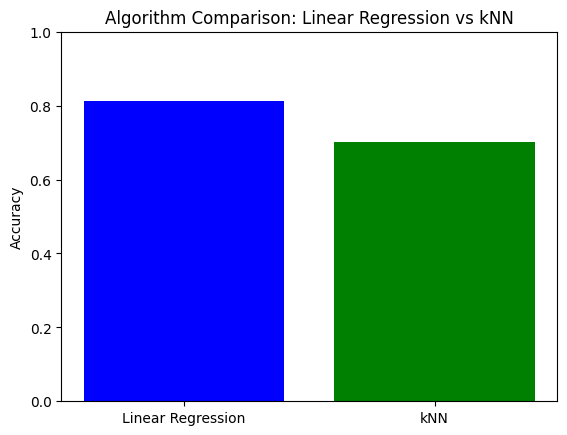

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


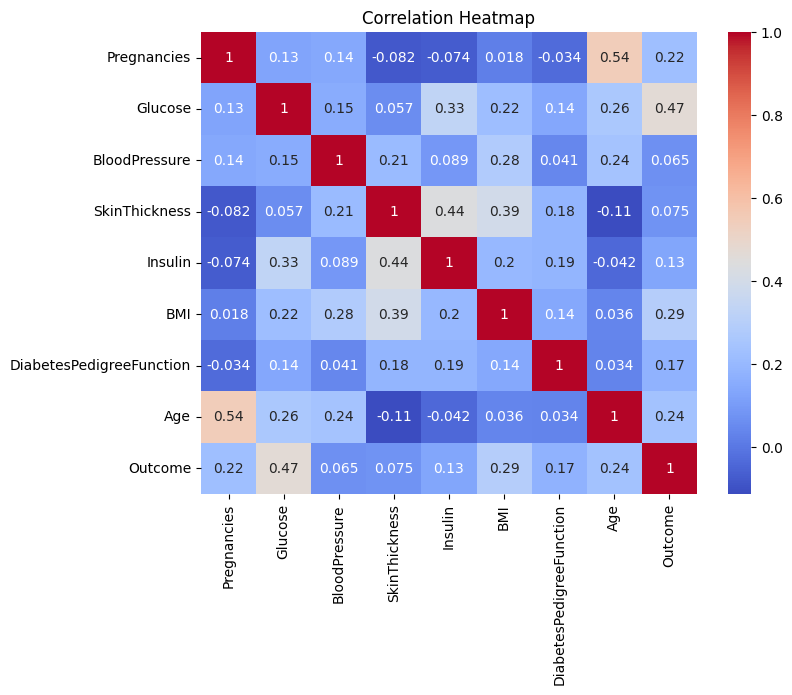

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


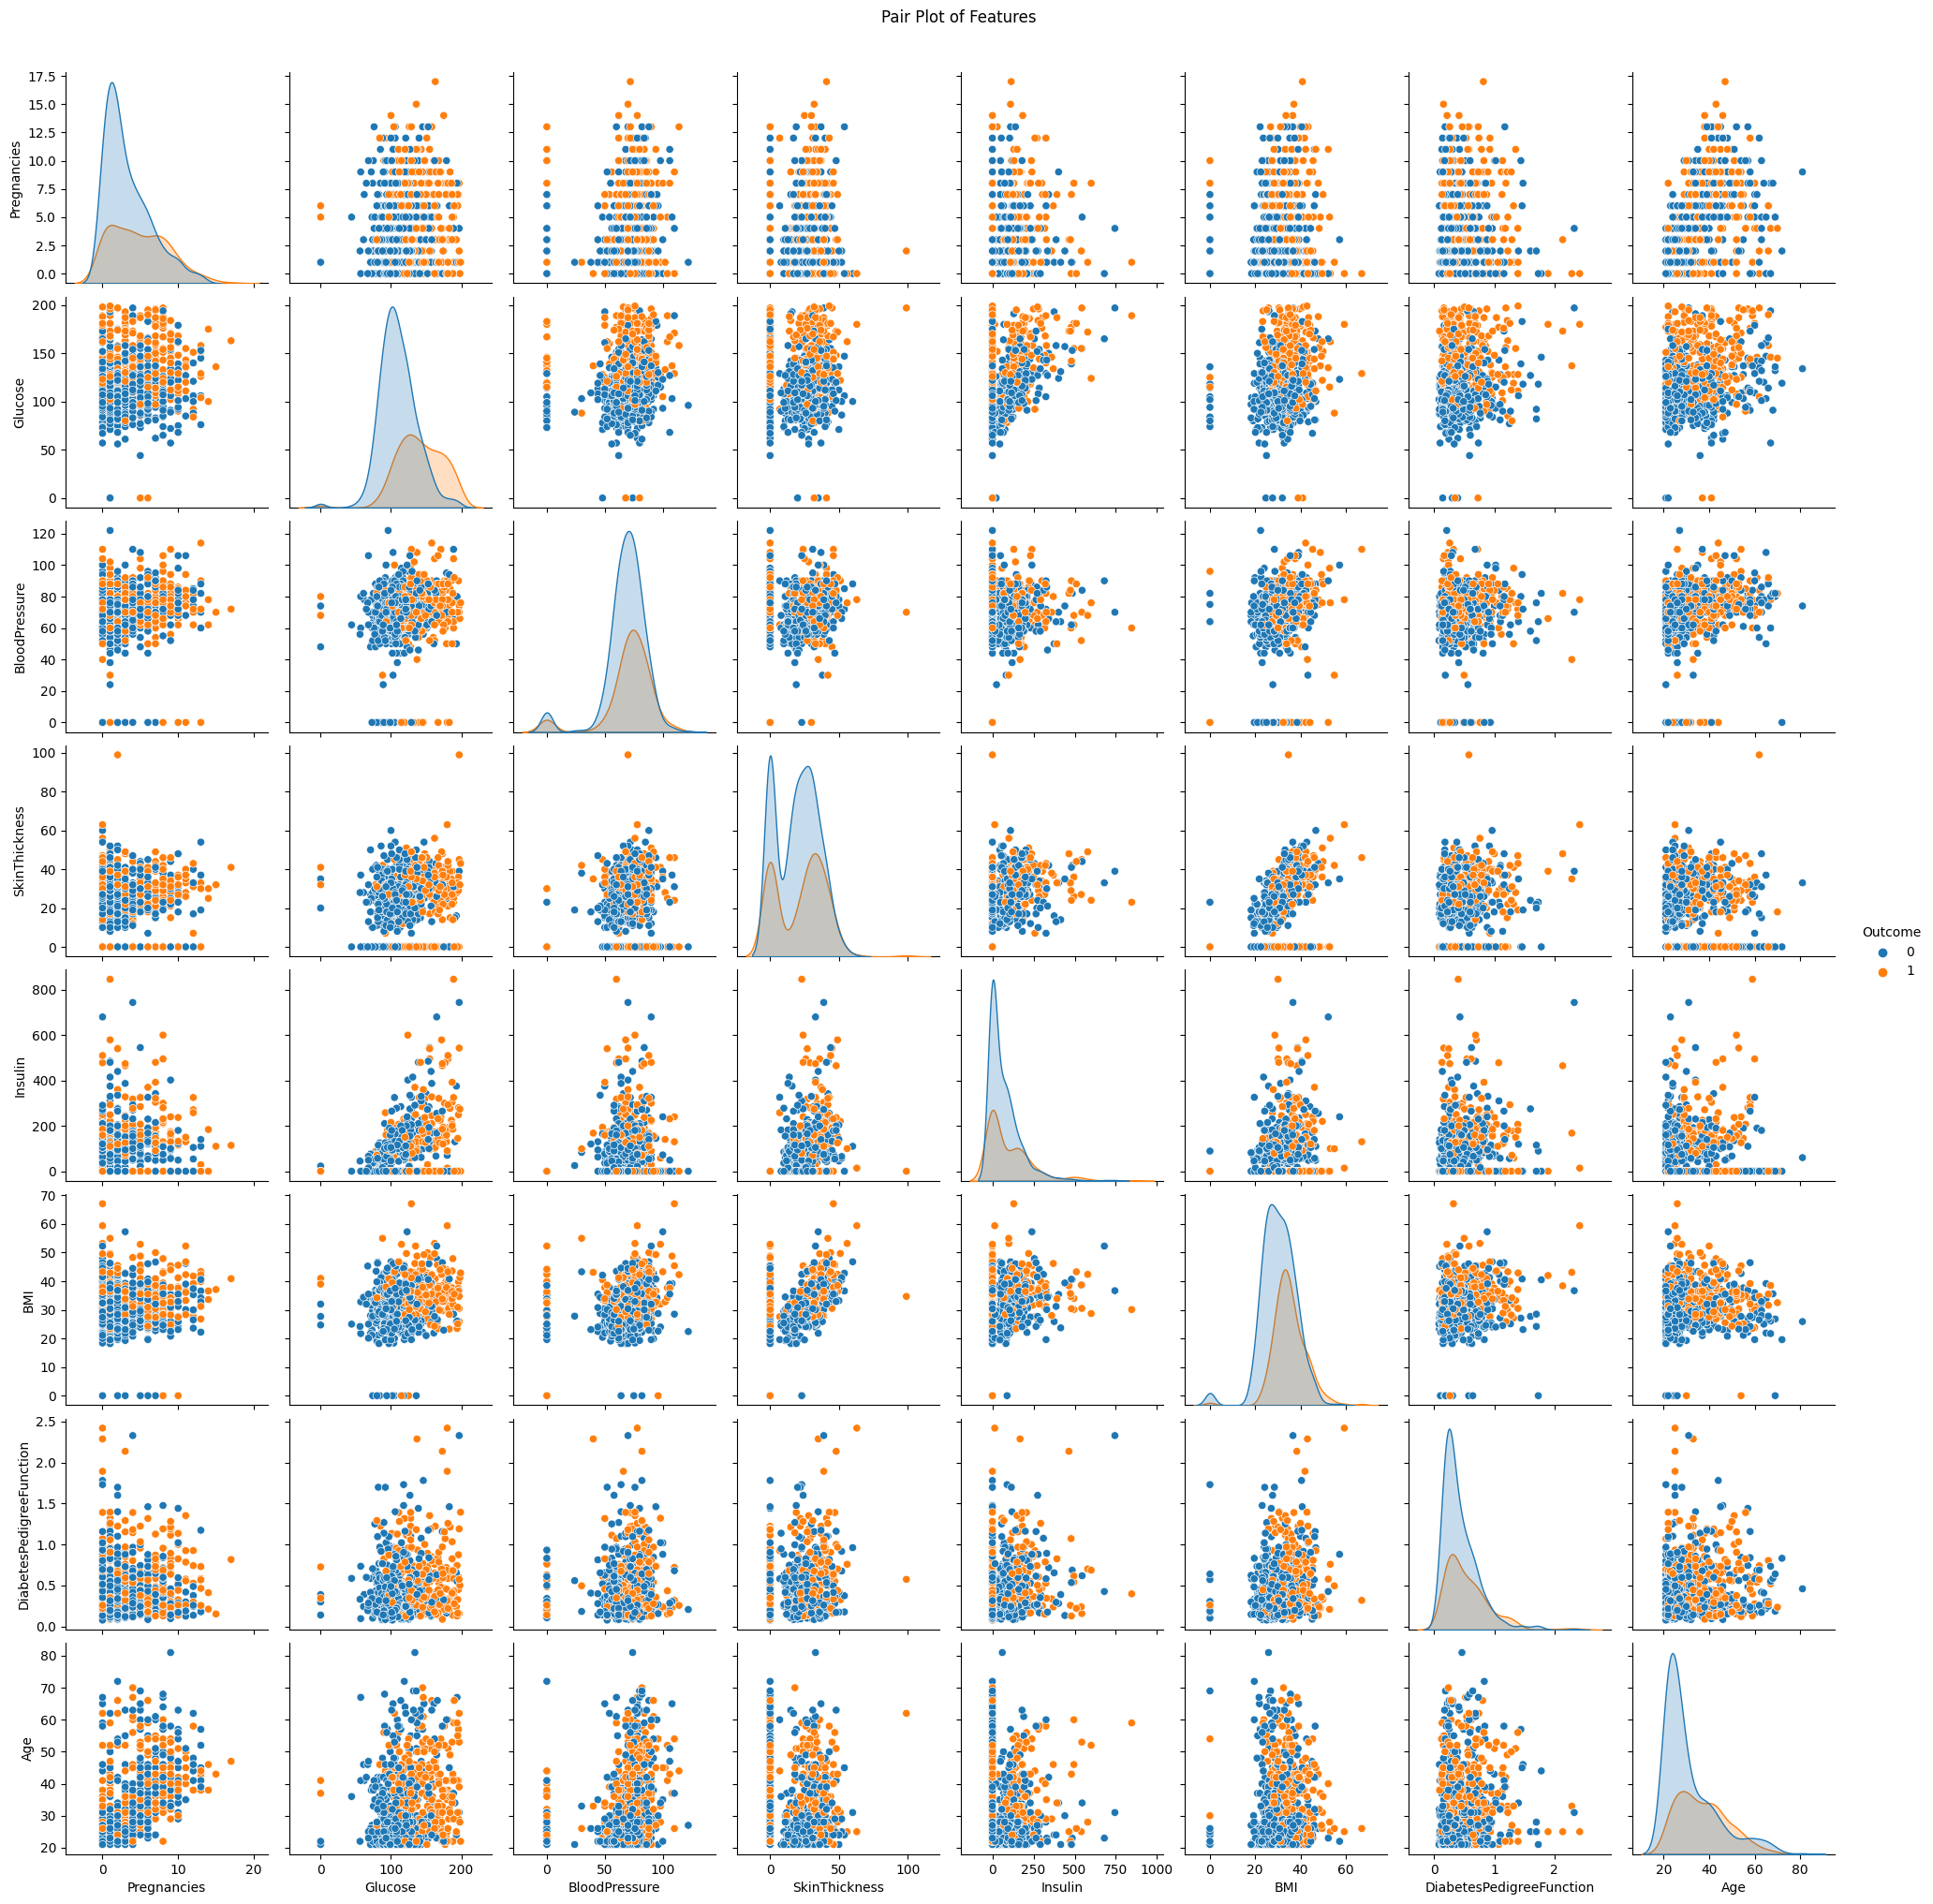

In [ ]:
# GUI Implementation
def predict_outcome():
    # Get user input
    try:
        inputs = [float(entry.get()) for entry in entries]
        inputs = np.array(inputs).reshape(1, -1)

        # Scale and transform inputs
        inputs_scaled = scaler.transform(inputs)
        inputs_poly = poly.transform(inputs_scaled)

        # Make predictions using both models
        lr_prediction = lr.predict(inputs_poly)[0]
        knn_prediction = knn.predict(inputs_poly)[0]

        # Convert Linear Regression prediction to binary
        lr_prediction_binary = 1 if lr_prediction >= 0.5 else 0

        # Display predictions
        result_label.config(text=f"Linear Regression: {lr_prediction_binary}, kNN: {knn_prediction}")
    except ValueError:
        result_label.config(text="Invalid input! Please enter numeric values.")
# GUI setup
root = tk.Tk()
root.title("Diabetes Outcome Prediction")
# Add input fields for features
feature_names = list(df.columns[:-1])
entries = []
tk.Label(root, text="Enter Values for Features:").pack()
for feature in feature_names:
    frame = tk.Frame(root)
    frame.pack(pady=2)
    tk.Label(frame, text=feature).pack(side=tk.LEFT)
    entry = tk.Entry(frame)
    entry.pack(side=tk.RIGHT)
    entries.append(entry)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_outcome)
predict_button.pack(pady=10)

# Result label
result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.pack(pady=10)

# Graph buttons
tk.Button(root, text="Show Algorithm Comparison", command=plot_algorithm_comparison).pack(pady=5)
tk.Button(root, text="Show Correlation Heatmap", command=plot_correlation_heatmap).pack(pady=5)
tk.Button(root, text="Show Pairplot", command=plot_pairplot).pack(pady=5)

# Run the GUI
root.mainloop()

Linear Regression Accuracy: 0.81
kNN Accuracy: 0.70


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


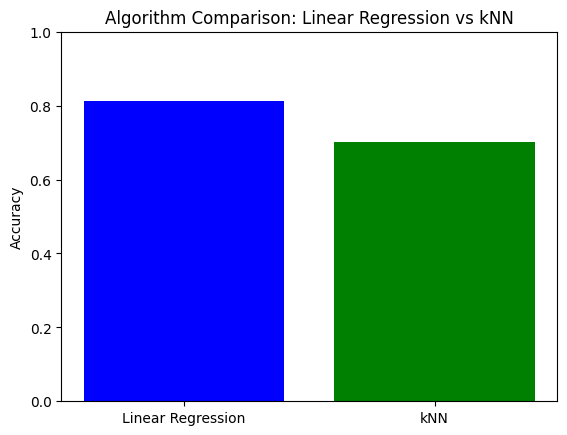

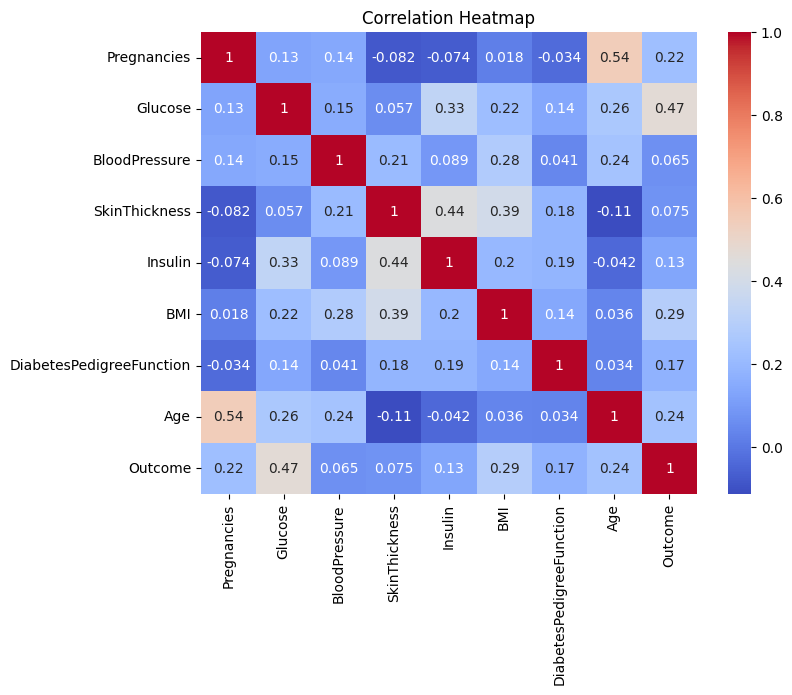

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


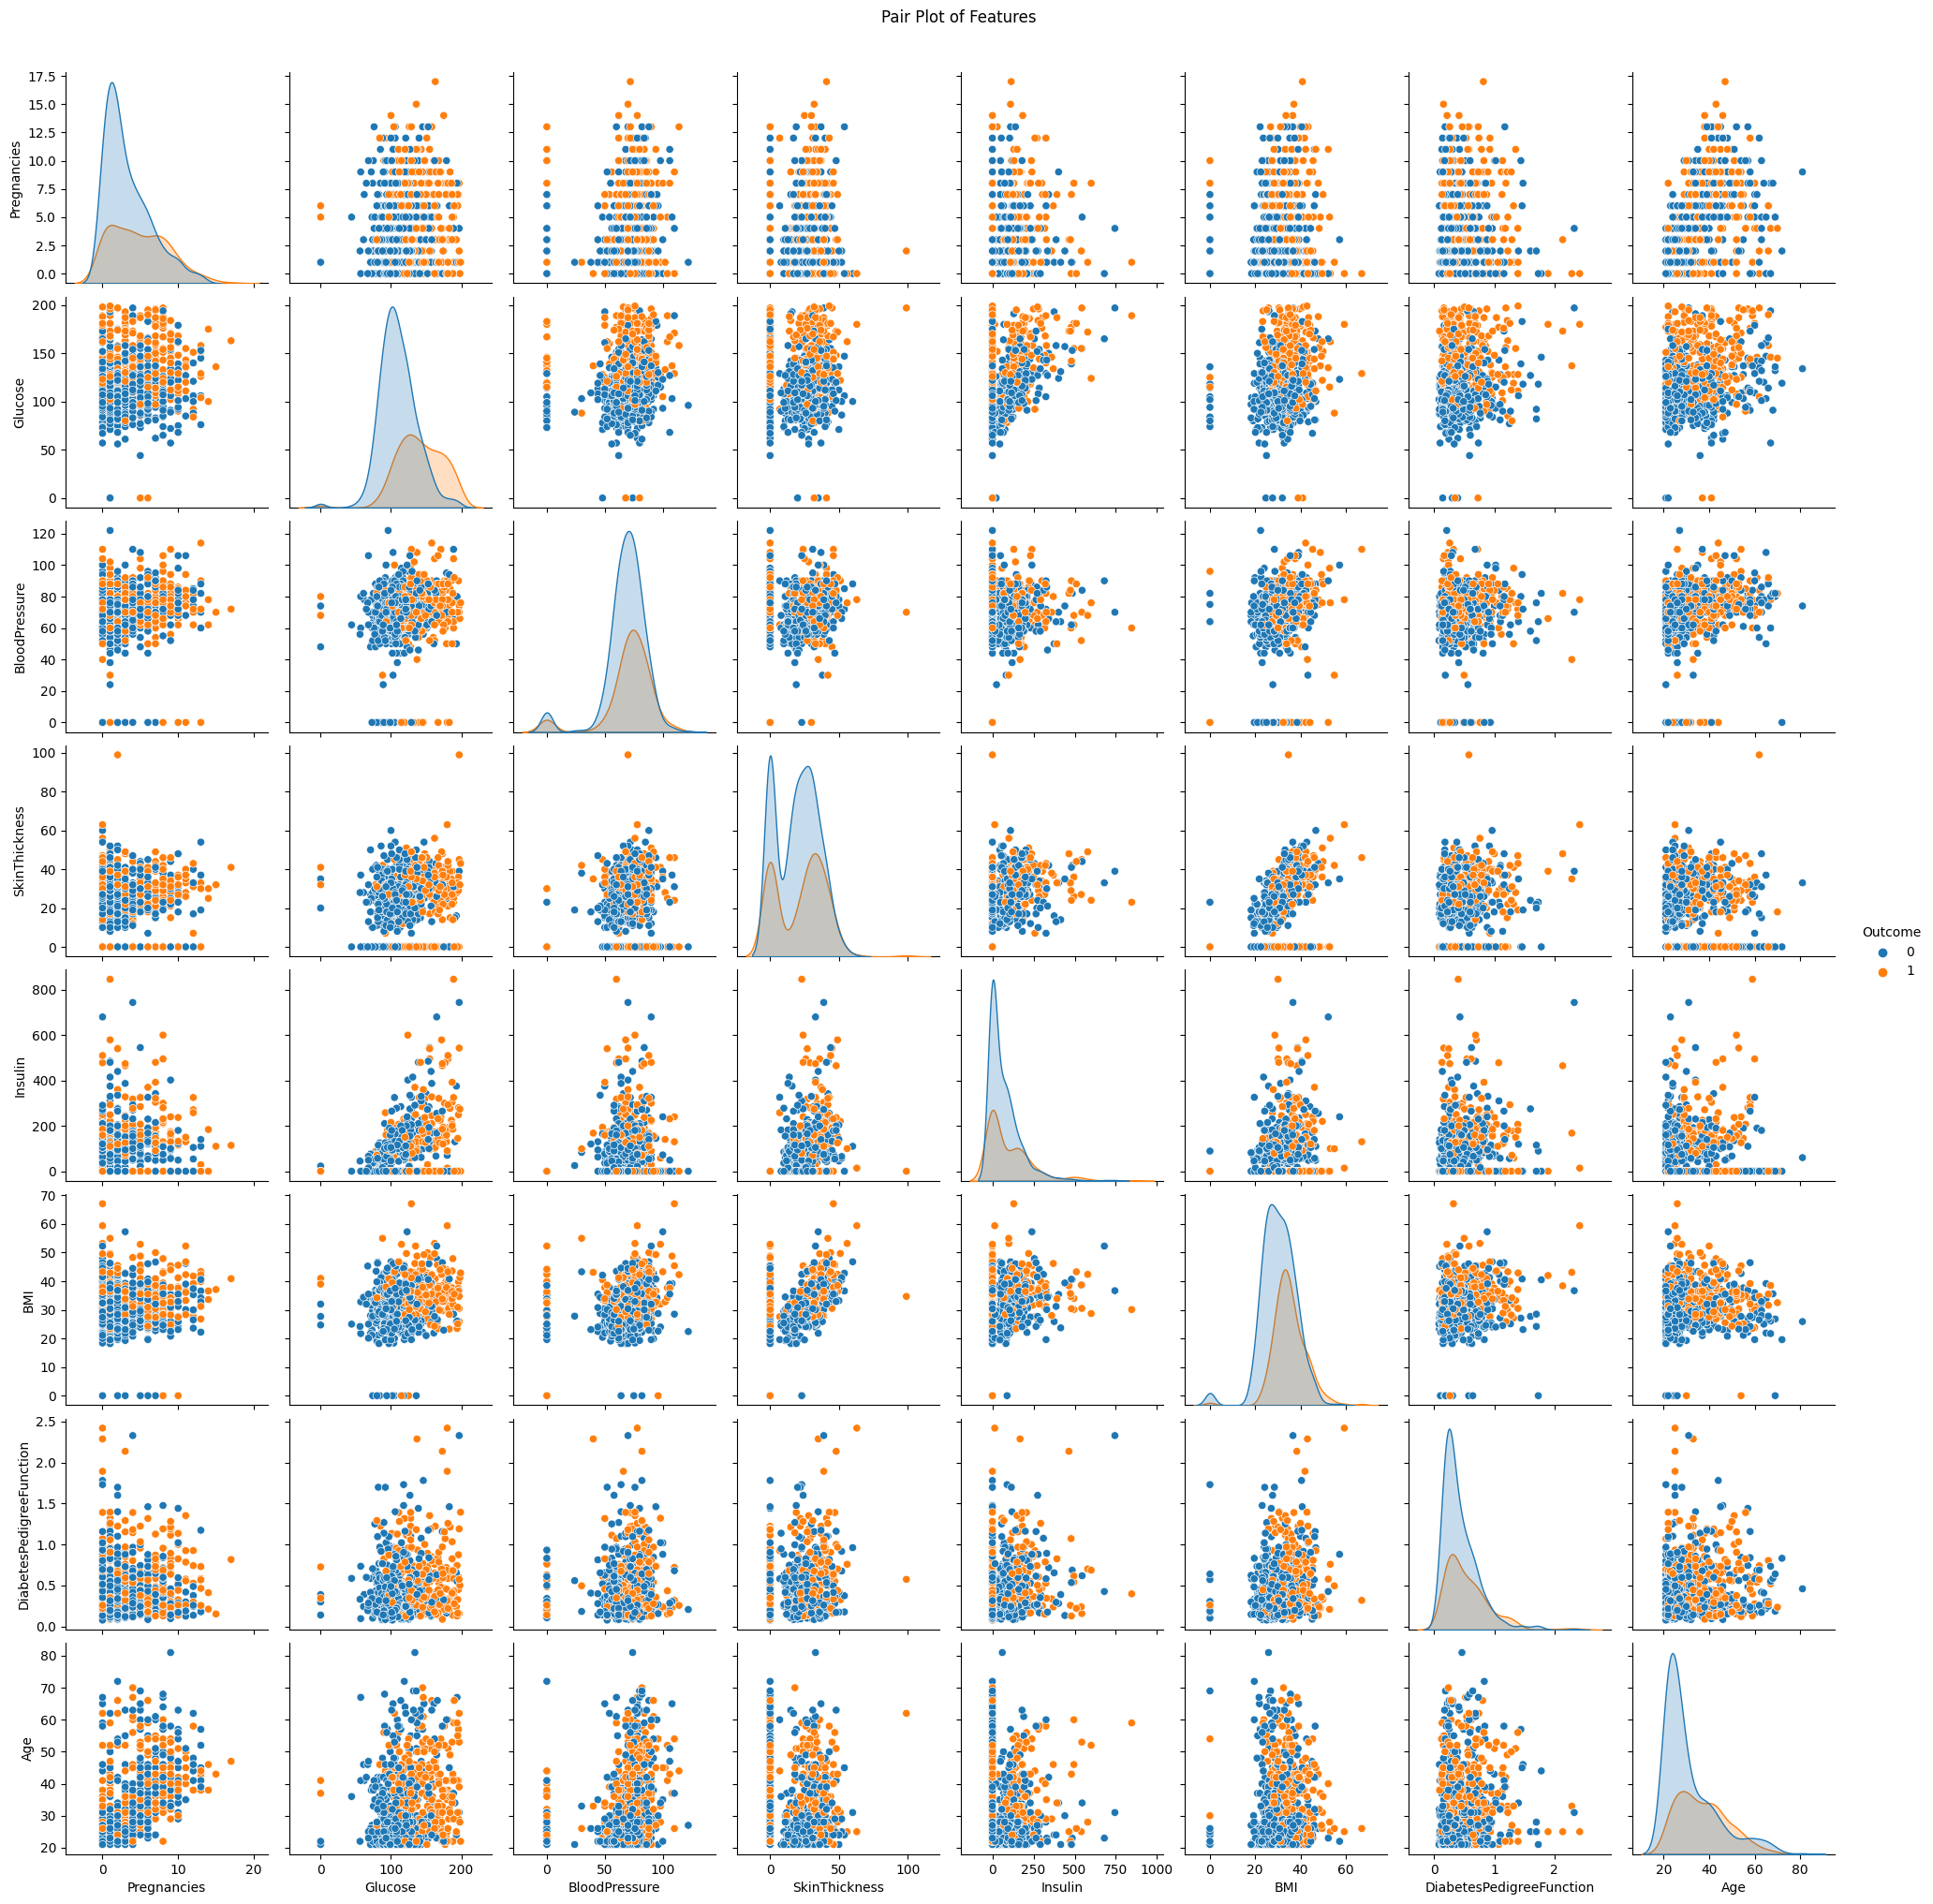

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import tkinter as tk

# Load dataset
df = pd.read_csv("diabetes.csv")

# Splitting features and target
Y = df['Outcome']
X = df.drop(['Outcome'], axis='columns')

# Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, train_size=0.8, random_state=7)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predicted_lr = lr.predict(X_test)
Y_predicted_lr_binary = [1 if i >= 0.5 else 0 for i in Y_predicted_lr]

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predicted_knn = knn.predict(X_test)

# Calculate accuracies
accuracy_lr = accuracy_score(Y_test, Y_predicted_lr_binary)
accuracy_knn = accuracy_score(Y_test, Y_predicted_knn)
print(f"Linear Regression Accuracy: {accuracy_lr:.2f}")
print(f"kNN Accuracy: {accuracy_knn:.2f}")


# Visualization: Algorithm Comparison
def plot_algorithm_comparison():
    accuracies = [accuracy_lr, accuracy_knn]
    algorithms = ['Linear Regression', 'kNN']
    plt.bar(algorithms, accuracies, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Algorithm Comparison: Linear Regression vs kNN')
    plt.show()

# Visualization: Correlation Heatmap
def plot_correlation_heatmap():
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

# Visualization: Pairplot
def plot_pairplot():
    sns.pairplot(df, hue='Outcome', diag_kind='kde')
    plt.suptitle("Pair Plot of Features", y=1.02)
    plt.show()

# GUI Implementation
def predict_outcome():
    # Get user input
    try:
        inputs = [float(entry.get()) for entry in entries]
        inputs = np.array(inputs).reshape(1, -1)

        # Scale and transform inputs
        inputs_scaled = scaler.transform(inputs)
        inputs_poly = poly.transform(inputs_scaled)

        # Make predictions using both models
        lr_prediction = lr.predict(inputs_poly)[0]
        knn_prediction = knn.predict(inputs_poly)[0]

        # Convert Linear Regression prediction to binary
        lr_prediction_binary = 1 if lr_prediction >= 0.5 else 0

        # Display predictions
        result_label.config(text=f"Linear Regression: {lr_prediction_binary}, kNN: {knn_prediction}")
    except ValueError:
        result_label.config(text="Invalid input! Please enter numeric values.")

# GUI setup
root = tk.Tk()
root.title("Diabetes Outcome Prediction")

# Add input fields for features
feature_names = list(df.columns[:-1])
entries = []
tk.Label(root, text="Enter Values for Features:").pack()
for feature in feature_names:
    frame = tk.Frame(root)
    frame.pack(pady=2)
    tk.Label(frame, text=feature).pack(side=tk.LEFT)
    entry = tk.Entry(frame)
    entry.pack(side=tk.RIGHT)
    entries.append(entry)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_outcome)
predict_button.pack(pady=10)

# Result label
result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.pack(pady=10)

# Graph buttons
tk.Button(root, text="Show Algorithm Comparison", command=plot_algorithm_comparison).pack(pady=5)
tk.Button(root, text="Show Correlation Heatmap", command=plot_correlation_heatmap).pack(pady=5)
tk.Button(root, text="Show Pairplot", command=plot_pairplot).pack(pady=5)

# Run the GUI
root.mainloop()
